In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn import preprocessing

In [13]:
df = pd.read_csv('diabetes.csv')

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


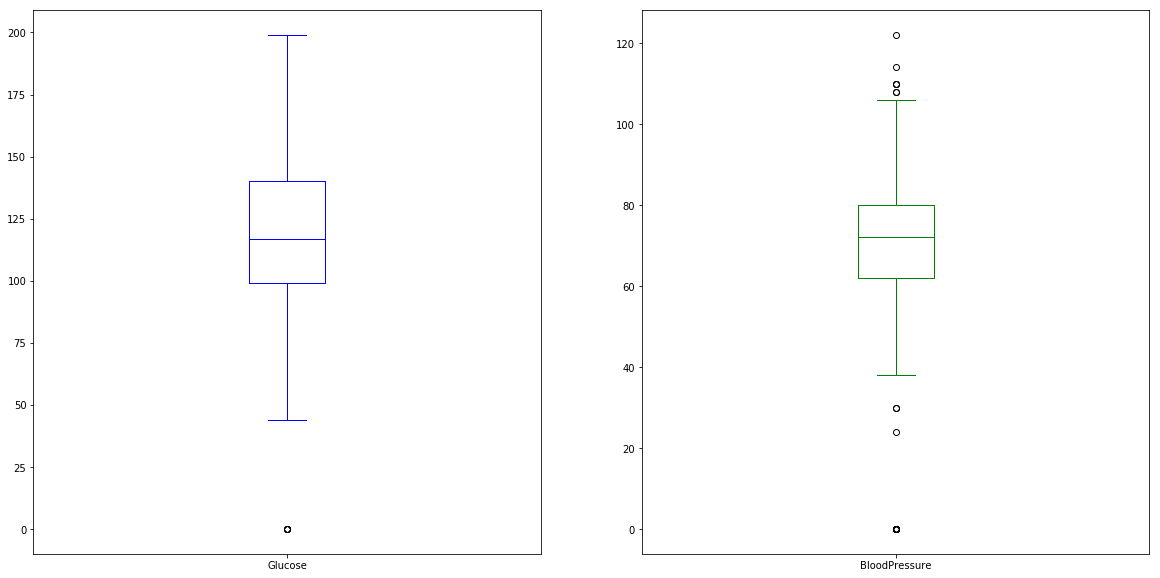

In [16]:
fig = plt.figure(figsize=(100, 80)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)


df['Glucose'].plot(kind='box', color='blue', figsize=(20, 10), ax=ax0)

df['BloodPressure'].plot(kind='box', color='green', figsize=(20, 10), ax=ax1)

plt.show()

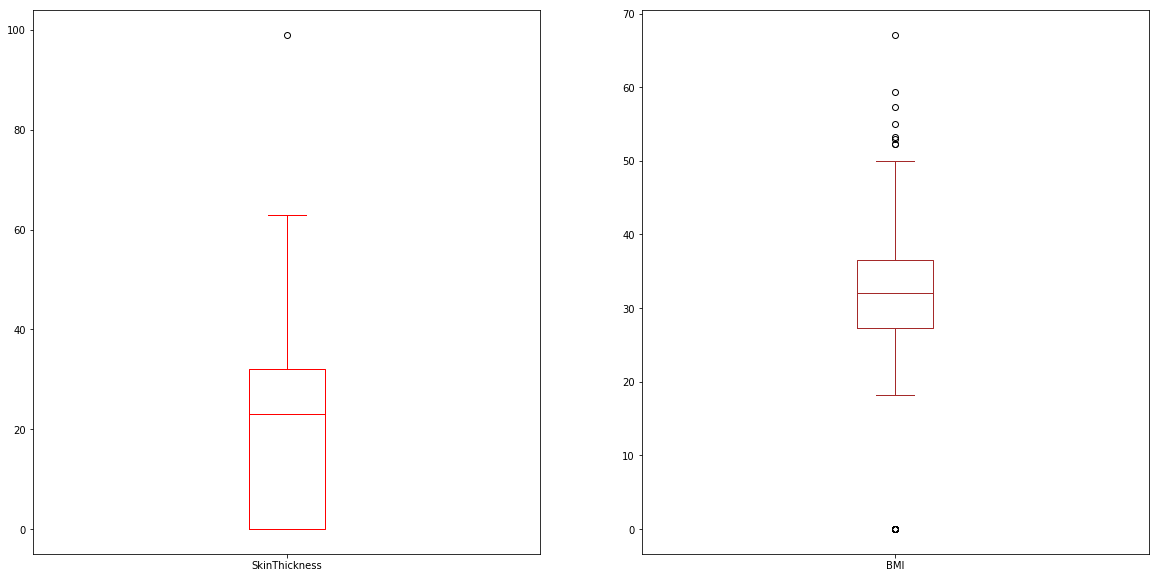

In [17]:
fig = plt.figure(figsize=(100, 80))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)


df['SkinThickness'].plot(kind='box', color='red', figsize=(20, 10), ax=ax0)

df['BMI'].plot(kind='box', color='brown', figsize=(20, 10), ax=ax1)

plt.show()

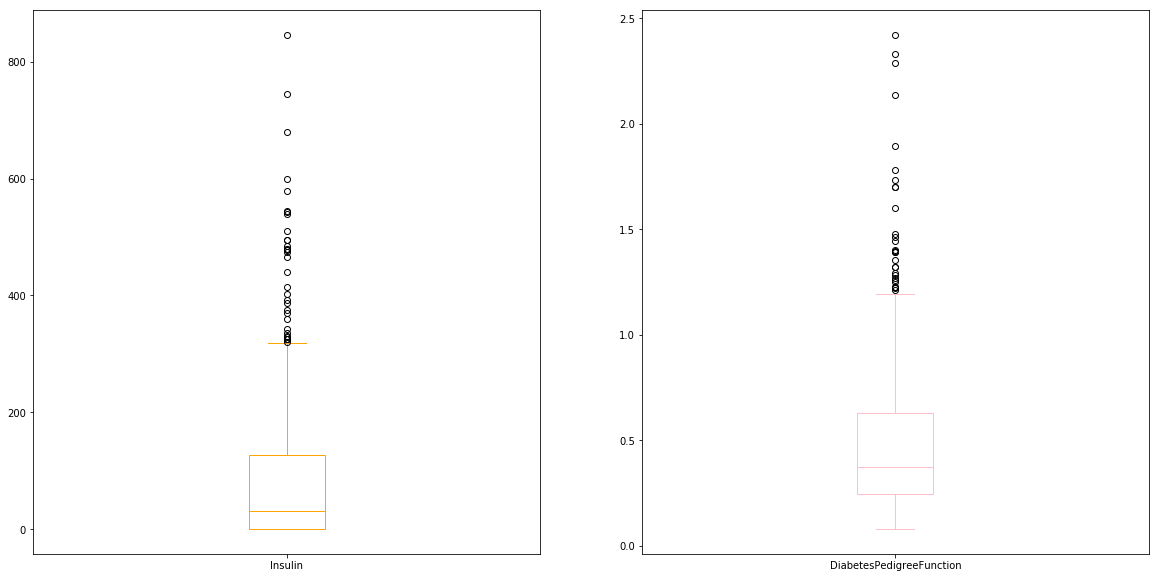

In [18]:
fig = plt.figure(figsize=(100, 80)) # create figure

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)


df['Insulin'].plot(kind='box', color='orange', figsize=(20, 10), ax=ax0)

df['DiabetesPedigreeFunction'].plot(kind='box', color='pink', figsize=(20, 10), ax=ax1)

plt.show()

In [19]:
X = df[['Pregnancies', 'Glucose', 'BloodPressure','Insulin', 'BMI','DiabetesPedigreeFunction','Age']].values
y = df["Outcome"]

In [20]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [21]:
# Create Decision Tree Classifier with maximum depth as 4
dTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [22]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
# Fit our train data in decision tree classifier
dTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [24]:
#Predict with decision tree
predTree = dTree.predict(X_testset)
#predTree = loanTree.predict(X)

In [25]:

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.709956709957


In [26]:
dTree.score(X_testset, y_testset)

0.70995670995671001

In [27]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

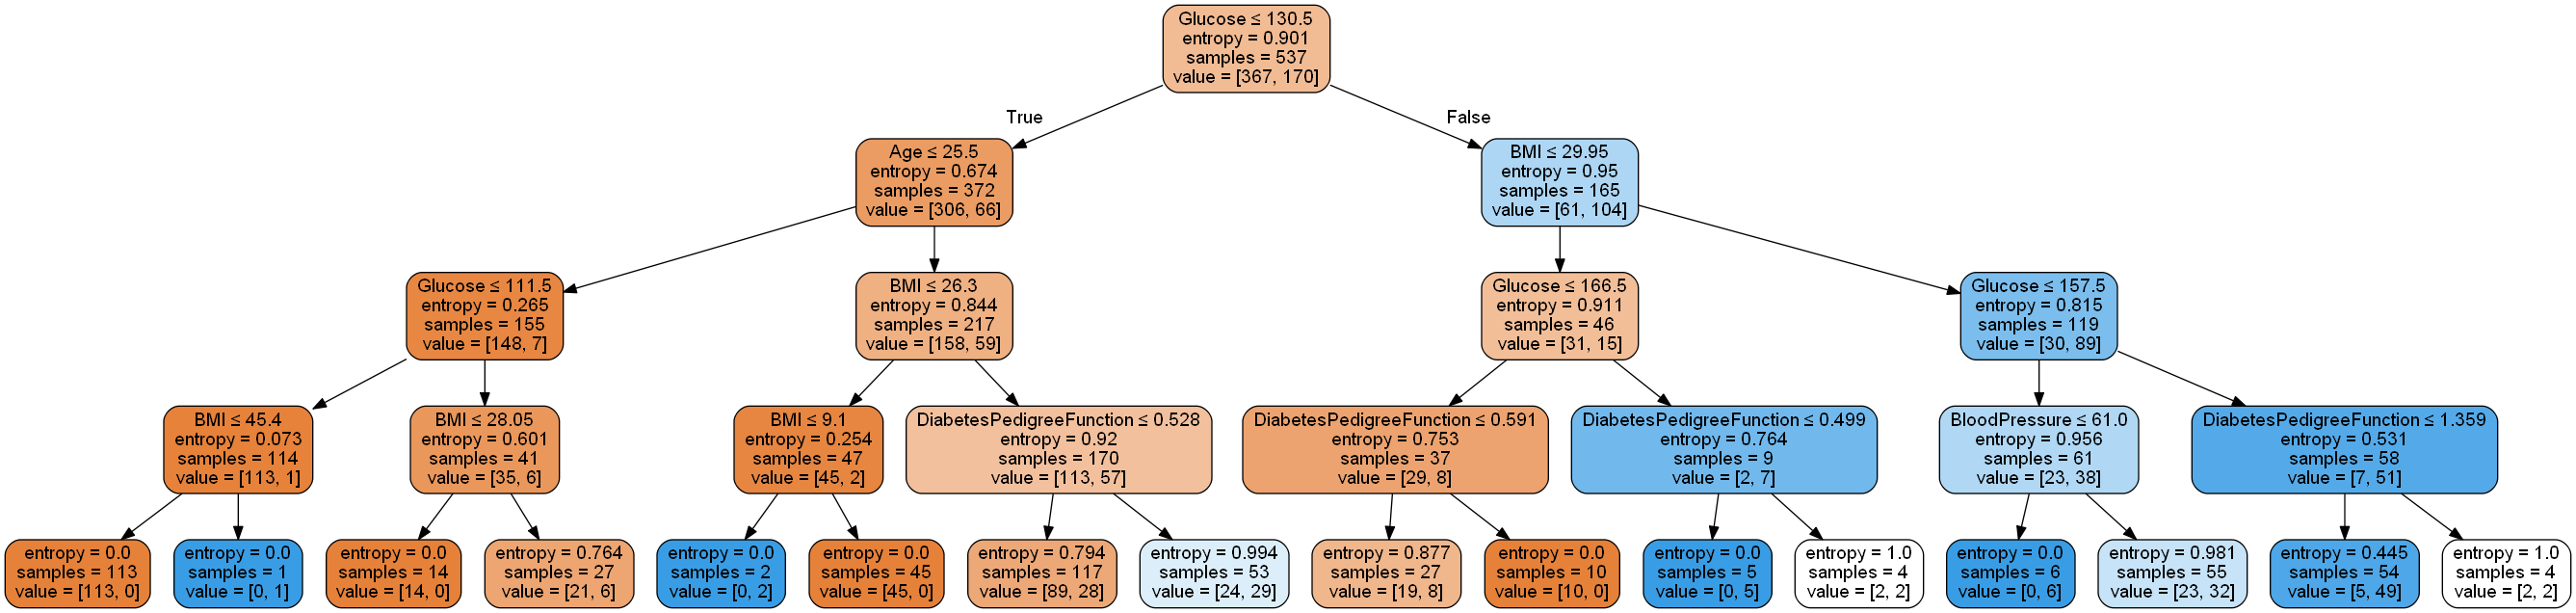

In [28]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
featureNames = ['Pregnancies', 'Glucose', 'BloodPressure','Insulin', 'BMI','DiabetesPedigreeFunction','Age']
export_graphviz(dTree,feature_names=featureNames, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [30]:
Ks = 15

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

#Find the best K from 0 to 15
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_trainset,y_trainset)
    yhat=neigh.predict(X_testset)
    mean_acc[n-1] = metrics.accuracy_score(y_testset, yhat)

    
    std_acc[n-1]=np.std(yhat==y_testset)/np.sqrt(yhat.shape[0])


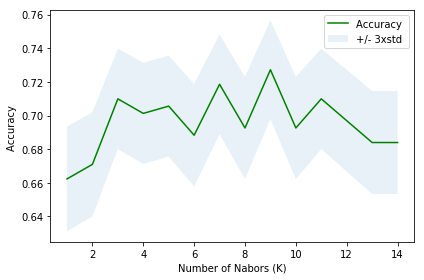

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [32]:
#best K value stored in Ks_best
Ks_best=np.where(mean_acc == np.amax(mean_acc))[0][0] + 1

print("Best Ks value is: " , Ks_best)

# Train the model with KNN using best K value
neigh = KNeighborsClassifier(n_neighbors = Ks_best).fit(X_trainset,y_trainset)

Best Ks value is:  9


In [33]:
# Predict Using KNN
yhat=neigh.predict(X_testset)

In [34]:
jaccard_score_KKN=jaccard_similarity_score(y_testset, yhat, normalize=True, sample_weight=None)
f1_score_KKN=f1_score(y_testset, yhat, labels=None,  average='weighted')

In [35]:
jaccard_score_KKN=jaccard_similarity_score(y_testset, yhat, normalize=True, sample_weight=None)
f1_score_KKN=f1_score(y_testset, yhat, labels=None,  average='weighted')

jaccard_score_DT=jaccard_similarity_score(y_testset, predTree, normalize=True, sample_weight=None)
f1_score_DT=f1_score(y_testset, predTree, labels=None,  average='weighted')


In [36]:
data = [['KNN', jaccard_score_KKN,f1_score_KKN], ['Decision Tree', jaccard_score_DT,f1_score_DT]]
df_report = pd.DataFrame(data, columns = ['Algorithm', 'Jaccard','F1-score'])

print(df_report)

       Algorithm   Jaccard  F1-score
0            KNN  0.727273  0.715886
1  Decision Tree  0.709957  0.709320


# Decision Tree Algorithm

In [37]:
data = [['Young', 'Low','N'], ['Young', 'Middle','N'],['Middle', 'Middle','Y'],['Old', 'High','Y'],['Middle', 'High','Y'],['Old', 'Low','N'],['Middle', 'Middle','Y'],['Young', 'Middle','Y'],['Middle', 'High','N'],] 
  
# Create the pandas DataFrame 
df_sam = pd.DataFrame(data, columns = ['Age', 'Income','Car'])
df_sam

,Age,Income,Car
0,Young,Low,N
1,Young,Middle,N
2,Middle,Middle,Y
3,Old,High,Y
4,Middle,High,Y
5,Old,Low,N
6,Middle,Middle,Y
7,Young,Middle,Y
8,Middle,High,N


In [38]:
df_sam.Age = pd.Categorical(df_sam.Age)
df_sam.Income = pd.Categorical(df_sam.Income)
df_sam['Agecode'] = df_sam.Age.cat.codes
df_sam['Incomecode'] = df_sam.Income.cat.codes

In [39]:
df_sam

,Age,Income,Car,Agecode,Incomecode
0,Young,Low,N,2,1
1,Young,Middle,N,2,2
2,Middle,Middle,Y,0,2
3,Old,High,Y,1,0
4,Middle,High,Y,0,0
5,Old,Low,N,1,1
6,Middle,Middle,Y,0,2
7,Young,Middle,Y,2,2
8,Middle,High,N,0,0


In [40]:
from scipy.stats import entropy
from math import log, e

labels = ['Y','Y','Y','Y','Y','N','N','N','N']

print((-(5/9)*log(5/9,2)) + (-(4/9)*log(4/9,2)))

0.9910760598382222


In [41]:
labels = ['Y','N','N']
print((-(1/3)*log(1/3,2)) + (-(2/3)*log(2/3,2)))

0.9182958340544896


In [42]:
labels = ['Y','Y','Y','N']
print((-(3/4)*log(3/4,2)) + (-(1/4)*log(1/4,2)))

0.8112781244591328


In [43]:
labels = ['Y','N']
print((-(1/2)*log(1/2,2)) + (-(1/2)*log(1/2,2)))

1.0


In [ ]:
labels = ['N','N']
print((-(0/2)*log(0/2,2)) + (-(0/2)*log(0/2,2)))

In [45]:
labels = ['Y','Y','Y','N']
print((-(3/4)*log(3/4,2)) + (-(1/4)*log(1/4,2)))

0.8112781244591328


In [46]:
labels = ['Y','N','N']
print((-(1/3)*log(1/3,2)) + (-(2/3)*log(2/3,2)))

0.9182958340544896


In [47]:
#information gain with age
0.9910760598382222 - ((3/9) * 0.9182958340544896 + (4/9) * 0.8112781244591328 + (2/9) * 1.0)

0.10218717094933338

In [48]:
#information gain with income
0.9910760598382222 - ((2/9) * 0 + (4/9) * 0.8112781244591328 + (3/9) * 0.9182958340544896)

0.3244093931715556

In [49]:
X = df_sam[['Agecode', 'Incomecode']].values
y = df_sam["Car"]

In [50]:
Tree_sam = DecisionTreeClassifier(criterion="entropy", max_depth = 4,min_samples_split=3)

In [51]:
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
Tree_sam.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

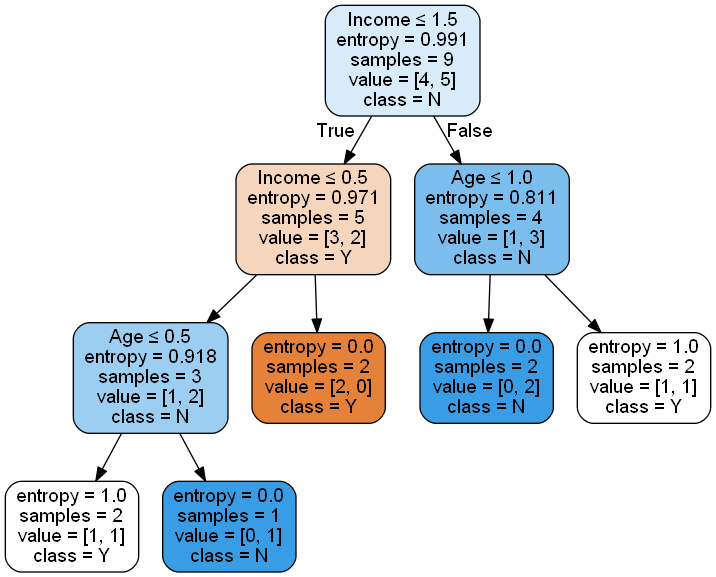

In [53]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
featureNames = ['Age', 'Income']
classNames = ['Y', 'N']
export_graphviz(Tree_sam,feature_names=featureNames, out_file=dot_data,class_names = classNames,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# KNN Algorithm

In [54]:
data = [[21, 8000,'N'], [24, 12000,'N'],[31, 14000,'Y'],[40, 19000,'Y'],[33, 18000,'N'],[38, 9000,'N'],[30, 13500,'Y'],[23, 15000,'Y'],[29, 18000,'Y'],[33, 17000,'NaN']] 
  
# Create the pandas DataFrame 
df_sam = pd.DataFrame(data, columns = ['Age', 'Income','Car'])
df_sam

,Age,Income,Car
0,21,8000,N
1,24,12000,N
2,31,14000,Y
3,40,19000,Y
4,33,18000,N
5,38,9000,N
6,30,13500,Y
7,23,15000,Y
8,29,18000,Y
9,33,17000,NaN


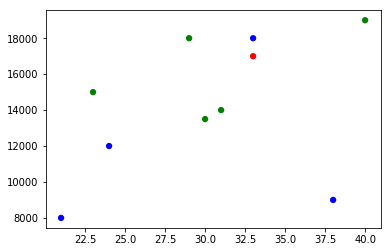

In [55]:
import numpy as np
col = np.where(df_sam['Car']=='Y','g',np.where(df_sam['Car']=='N','b','r'))

plt.scatter(df_sam['Age'], df_sam['Income'], c=col, s=40, linewidth=0)
plt.show()